In [1]:
# blanket import modules
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import pprint
from scipy.stats import linregress

In [2]:
# setting up paths for data
happy_cs = "Output/happy_comb-data.csv"

In [3]:
happy_df = pd.read_csv(happy_cs)
happy_df

,RANK,Country,Happiness Score,Healthy Life Expectancy,Sunshine Hrs per Year,Average Income ($),Alcohol Consumption (L/year)
0,1,Finland,7.821,0.775,1858.00,18742.0,10.65
1,2,Denmark,7.636,0.777,1932.00,20304.0,10.13
2,3,Iceland,7.557,0.803,1326.00,19300.0,9.21
3,4,Switzerland,7.512,0.822,1932.75,25787.0,11.23
4,5,Netherlands,7.415,0.787,1662.00,19690.0,9.67
...,...,...,...,...,...,...,...
93,136,India,3.777,0.471,2517.02,1314.0,5.61
94,137,Zambia,3.760,0.306,2965.47,1045.0,4.46
95,138,Malawi,3.750,0.388,2795.87,733.0,4.08
96,139,Tanzania,3.702,0.425,3032.85,992.0,12.04


In [4]:
# Linear Regression Function
plt.style.use("ggplot")

def linear_regression(x_axis_lreg, y_axis_lreg, x_label, y_label, line_eq_x, line_eq_y):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_lreg, y_axis_lreg)
    regress_values = x_axis_lreg * slope + intercept
    line_eq = (f'y = {(round(slope,2))}x  + {(round(intercept,2))}')

    plt.scatter(x_axis_lreg, y_axis_lreg, marker = 'o', facecolor = 'cornflowerblue', edgecolor = 'black')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f'Country Happiness Score vs. {y_label}', fontsize = 12)
    plt.plot(x_axis_lreg, regress_values, 'r')
    plt.annotate(line_eq, (line_eq_x, line_eq_y), fontsize = 12, color = 'red', size = 14)
    plt.show
    
    correlation = st.pearsonr(x_axis_lreg, y_axis_lreg)
    print(f'The correlation between Happiness and {y_label} is {(round(correlation[0],2))}.')
    
#     print(f'The r-square value is: {round(rvalue**2,2)}.')

## Happiness by average income
#### Q: Are countries with higher average incomes happier?

The correlation between Happiness and Average Income is 0.84.


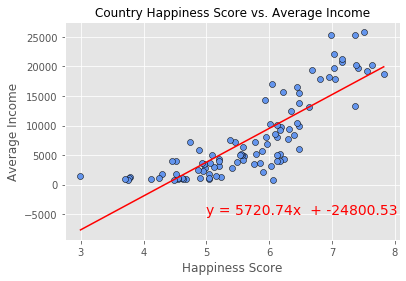

In [5]:
linear_regression(happy_df['Happiness Score'], happy_df['Average Income ($)'], 'Happiness Score', 'Average Income', 5, -5000)

In [6]:
avg_income = happy_df.sort_values('Average Income ($)', ascending = False)
avg_income.head()

,RANK,Country,Happiness Score,Healthy Life Expectancy,Sunshine Hrs per Year,Average Income ($),Alcohol Consumption (L/year)
3,4,Switzerland,7.512,0.822,1932.75,25787.0,11.23
13,16,United States of America,6.977,0.628,2827.62,25332.0,9.97
6,8,Norway,7.365,0.786,1373.33,25272.0,7.14
12,15,Canada,7.025,0.783,2028.04,22042.0,8.81
9,12,Australia,7.162,0.772,2843.57,21329.0,10.36


In [7]:
happiest_country = happy_df.loc[happy_df['Country'] == 'Finland']
happiest_country_df = pd.DataFrame({'Country' : happiest_country['Country'],
                                    'Happiness Score' : happiest_country['Happiness Score']})
happiest_country_df

,Country,Happiness Score
0,Finland,7.821


In [12]:
# avg_income['Country + Rank'] = avg_income['Country'] + " (Happiness Rank: " + avg_income['RANK'].astype(str) +")"

avg_income_bcdata = pd.DataFrame({'Country' : avg_income['Country'], 
                                  'Happiness Score' : avg_income['Happiness Score'],})

avg_income_bcdata = avg_income_bcdata.head(5)
avg_income_concat_df = pd.concat([happiest_country_df, avg_income_bcdata])
avg_income_concat_df

,Country,Happiness Score
0,Finland,7.821
3,Switzerland,7.512
13,United States of America,6.977
6,Norway,7.365
12,Canada,7.025
9,Australia,7.162


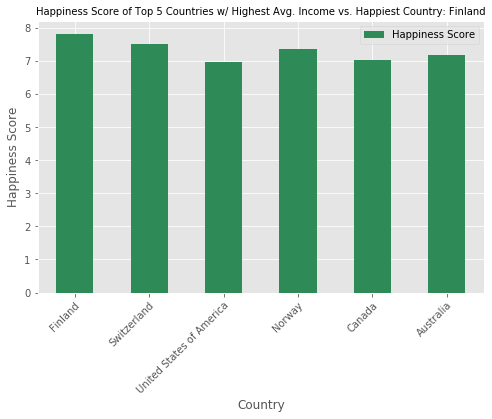

In [31]:
# colors = {avg_income_concat_df.loc[avg_income_concat_df['Country'] == 'Finland'] : 'gold',
#           avg_income_concat_df.loc[avg_income_concat_df['Country'] == 'Switzerland'] : 'seagreen',
#           avg_income_concat_df.loc[avg_income_concat_df['Country'] == 'United States of America'] : 'seagreen',
#           avg_income_concat_df.loc[avg_income_concat_df['Country'] == 'Norway'] : 'seagreen',
#           avg_income_concat_df.loc[avg_income_concat_df['Country'] == 'Canada'] : 'seagreen',
#           avg_income_concat_df.loc[avg_income_concat_df['Country'] == 'Australia'] : 'seagreen'}

avg_income_bc = avg_income_concat_df.plot(kind = 'bar', color = 'seagreen', figsize = (8,5))

plt.title('Happiness Score of Top 5 Countries w/ Highest Avg. Income vs. Happiest Country: Finland', fontsize = 10)
plt.xlabel('Country')
plt.ylabel('Happiness Score')

xticks = avg_income_concat_df['Country']
avg_income_bc.set_xticklabels(xticks, rotation=45, rotation_mode="anchor", ha="right", wrap=True)

plt.show()

# Need to figure out how to change the color of just one bar (Finland)
# Thoughts on adding an avg. happiness score line to these bar charts??

## Happiness by annual sunshine 
#### Q: Does the weather of a country (av sunshine) influence happiness?

In [ ]:
linear_regression(happy_df['Happiness Score'], happy_df['Sunshine Hrs per Year'], 'Happiness Score', 'Sunshine Hours per Year', 3, 1500)

In [ ]:
annual_sunshine = happy_df.sort_values('Sunshine Hrs per Year', ascending = False)
annual_sunshine.head()

## Happiness by life expectancy
#### Q: Are countries with longer life expectancies happier?

In [ ]:
linear_regression(happy_df['Happiness Score'], happy_df['Healthy Life Expectancy'], 'Happiness Score', 'Healthy Life Expectancy', 3, 0.8)

In [ ]:
life_expectancy = happy_df.sort_values('Healthy Life Expectancy', ascending = False)
life_expectancy.head()

## Happiness by alcohol consumption
#### Q: Does Alcohol Influence happiness?

In [ ]:
linear_regression(happy_df['Happiness Score'], happy_df['Alcohol Consumption (L/year)'], 'Happiness Score', 'Alcohol Consumption (L/year)', 5.5, 1.5)

In [ ]:
alcohol_consumption = happy_df.sort_values('Alcohol Consumption (L/year)', ascending = False)
alcohol_consumption.head()